In [1]:
#Librerías:
import numpy as np
import matplotlib.pyplot as plt

#Método De Euler:


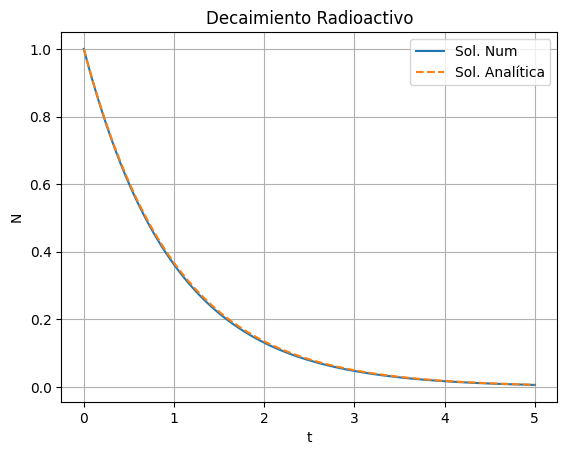

In [5]:
#Decaimiento radiactivo:

#Definición de función:

def funcion(N,t):
  a = 1
  return -a*N

#Solución:

#Condiciones iniciales:
to = 0
No = 1
tf = 5

#Definición de pasos en el tiempo:
n = 100
dt = (tf - to)/n

#Array de linea temporal
t = np.linspace(to,tf,n)

#Arreglo de ceros para guardar la solución numérica
N = np.zeros(len(t))
N[0] = No

#Solución a travez de metodo Euler de la EDO
for i in range(len(t)-1):
  N[i+1] = N[i] + dt*funcion(N[i],t[i])


#Solución analítica:
a= 1
N_ana = No * np.exp(-a * t)

#Gráfica de solución:
plt.plot(t,N, label="Sol. Num")
plt.plot(t,N_ana, label="Sol. Analítica", linestyle='dashed')
plt.title("Decaimiento Radioactivo")
plt.xlabel("t")
plt.ylabel("N")
plt.grid()
plt.legend()
plt.show()

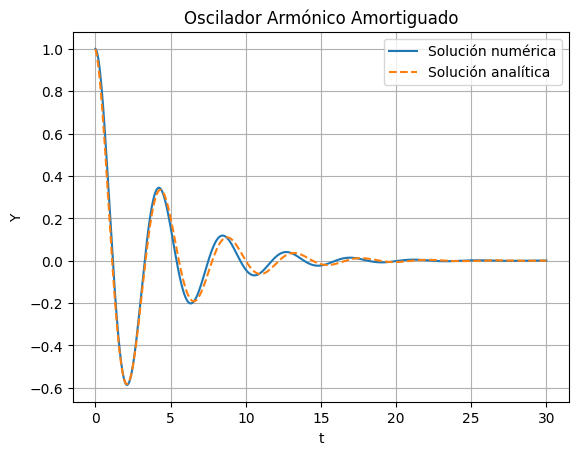

In [14]:
# Ecuaciòn diferencial de oscilador armónico:

#Parametros independientes del oscilador:
gama = 0.5
w = 1.5
params = (gama,w)
to = 0
tf = 30

#Numero de puntos y pasos en t
n = 1000
dt = (tf - to)/n

#Arreglo de tiempo, velocidad y posición:
t = np.linspace(to,tf,n)
v = np.zeros(len(t))
y = np.zeros(len(t))

#Condiciones iniciales:
yo = 1
vo = 1E-12


v[0] = vo
y[0] = yo

#Método euler para resolver EDO:
for i in range(n-1):
  v[i+1] = v[i] - dt*((gama * v[i]) + (w**2)*y[i])
  y[i+1] = y[i] + dt*v[i+1]


#Solución analítica:
omega = np.sqrt(w ** 2- gama ** 2)
y_ana = yo * np.exp(-gama / 2 * t) * np.cos(omega * t)

#Solución analítica:
plt.plot(t,y, label='Solución numérica')
plt.plot(t,y_ana, label='Solución analítica', linestyle='dashed')
plt.title("Oscilador Armónico Amortiguado")
plt.xlabel("t")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()





# Metodo Runge Kutta de orden 4.



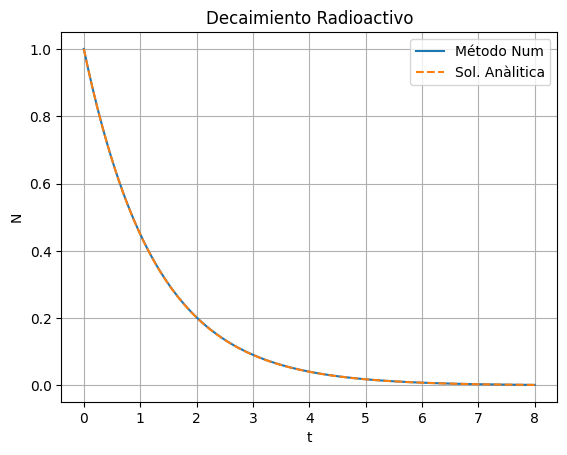

In [17]:
#Metodo Runge Kutta de decaimiento reactivo:
def funcion(t,N):
  a = 0.8
  return -a*N

#Pasos Iniciales:
to = 0
No = 1
tf = 8
n = 500
h = (tf - to)/n

#Se crea lìnea temporal:
t = np.linspace(to,tf,n)

#Array para almacenar soluciones de N:
N = np.zeros(len(t))
N[0] = No


#Ciclo para Runge Kutta:

for i in range(len(t)-1):
  K1 = funcion(t[i], N[i])
  K2 = funcion( (t[i] + h/2),(N[i] + h/2*K1))
  K3= funcion( (t[i] + h/2),(N[i] + h/2*K2))
  K4 = funcion( (t[i] + h),(N[i] + h*K3))

#Definiciòn Runge Kutta 4:
  N[i+1] = N[i] + ((h/6)*(K1+2*K2+2*K3+K4))

#Soluciòn analìtica:
a = 0.8
analitica = No * np.exp(-a*t)

#Gráfica:
plt.plot(t,N, label = 'Método Num')
plt.plot(t,analitica, label='Sol. Anàlitica', linestyle= 'dashed')
plt.title("Decaimiento Radioactivo")
plt.grid()
plt.legend()
plt.xlabel("t")
plt.ylabel("N")
plt.show()


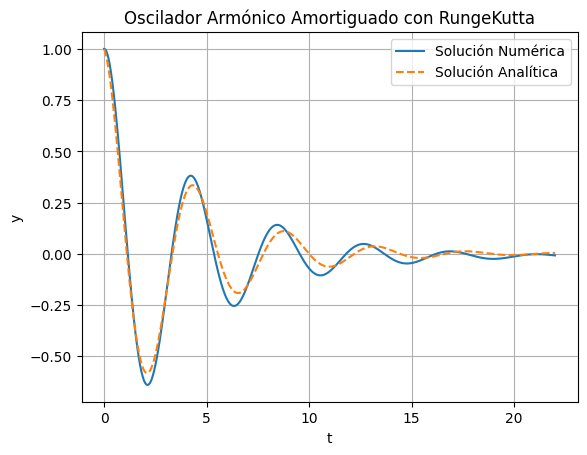

In [33]:
#Mètodo Rungekutta Para Oscilador Amortiguado:

#Parametros iniciales del Oscilador:
gama = 0.5
w = 1.5
params = (gama,w)
to = 0
tf = 22

#Definición de funciónes que representan la Edo

def funcion(y,v):
  gama = 0.5
  w = 1.5
  dv = -(gama * v + (w ** 2) * y)
  dy = v
  return dv,dy

#Número de puntos:
n = 1000

h = (tf - to)/n

#Creando arreglos de velocidad y poscición
t = np.linspace(to,tf,n)
yo = 1
vo = 1E-12
v = np.zeros(len(t))
y = np.zeros(len(t))

v[0] = vo
y[0] = yo

#Soluciòn paraa Y y V por método Runge Kutta:
for i in range(n-1):
  K1 = funcion(y[i], v[i])[1]
  K2 = funcion( (y[i] + h/2),(v[i] + (h/2)*K1))[1]
  K3= funcion( (y[i] + h/2),(v[i] + (h/2)*K2))[1]
  K4 = funcion( (y[i] + h),(v[i] + h*K3))[1]

  y[i+1] = y[i] + (h/6) * (K1 + 2*K2 + 2*K3 + K4)

  ######################################################

  K11 = funcion(y[i], v[i])[0]
  K21 = funcion( (y[i] + h/2),(v[i] + (h/2)*K11))[0]
  K31= funcion( (y[i] + h/2),(v[i] + (h/2)*K21))[0]
  K41 = funcion( (y[i] + h),(v[i] + h*K31))[0]

  v[i+1] = v[i] + (h/6) * (K11 + 2*K21 + 2*K31 + K41)


# Solución analítica para comparación
omega = np.sqrt(w ** 2 - gama ** 2)
y_ana = yo * np.exp(-gama / 2 * t) * np.cos(omega * t)

# Gráfica
plt.plot(t, y, label='Solución Numérica')
plt.plot(t, y_ana, label='Solución Analítica', linestyle='dashed')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("Oscilador Armónico Amortiguado con RungeKutta")
plt.show()